# **California Housing Price**

#### **Context**

In 1990, the U.S. Census captured detailed housing and demographic information in California, offering a snapshot of the state’s residential landscape at the time. The dataset that is built upon it reveals patterns in home values, household income, and population distribution factors that can influence investment, development, and policy decisions. Understanding these relationships is key for identifying areas of opportunity and potential market shifts.

California’s housing market in the dataset reflected a mix of urban growth, regional disparities, and evolving economic conditions. Median home values varied widely depending on location, amenities, and local demographics, offering insight into long-term trends in property appreciation. By analyzing and making a model prediction utilizing this historical data, businesses can better understand the economic environment and guesses as well as estimate the values of housing based upon existing indicators.

#### **Problem Statement**

Accurately estimating housing prices is critical for investment cost analysis, as it enables informed decision-making on property acquisition and development. Without reliable estimates, businesses risk overpaying for assets or missing profitable opportunities. Leveraging historical housing and demographic data can provide a strong foundation for these projections.

#### **Goal**

The primary objective is to determine and predict median house values using a machine learning model trained on historical census-based housing data. This prediction will support investment planning by providing a data-driven estimate of property values. Ultimately, the goal is to translate historical insights into actionable forecasts for modern real estate strategies.

#### **Analytic Approach**

We will explore and analyze patterns among key housing and demographic features to understand their relationship with property values. Based on these insights, a regression model will be developed to predict housing prices. This approach ensures that both statistical trends and practical real estate considerations inform the predictions.

#### **Metric Evaluation**

Model performance will be evaluated using RMSE, MAE, and MAPE to ensure accuracy and interpretability. RMSE and MAE provide measures of prediction error in actual price units, while MAPE offers a percentage-based accuracy measure. Together, these metrics will give a comprehensive view of how well the model performs in estimating housing prices.

#### **Data Understanding**

- Dataset is from California's census housing price in 1990
- Every rows represent about housing properties and its features

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| latitude | Float | Latitude coordinates of districts |
| longitude | Float | Longitude coordinates of districts |
| housing_median_age | Float | Median age for the houses in a district |
| total_rooms | Float | Median amount of rooms in the districts |
| total_bedrooms | Float | Median amount of bedrooms in the district|
| population | Float | Populations of the district |
| households | Float | Amount of Households in the district |
| median_income | Float | Median income of the district (quite likely already scaled from 1-15) |
| ocean_proximity | Object | Proximity of the district from the ocean |
| median_house_value | Float | Median value of a house in the district |

<br>

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# SKLearn and Statsmodels Libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from statsmodels.api import OLS, add_constant
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

# EDA Libraries
from skrub import TableReport
from feature_engine.outliers import  OutlierTrimmer

# etc Libraries
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import category_encoders as ce

# **Part 1: Data Initialization**

In [3]:
# Load Dataset
df = pd.read_csv('data_california_house.csv')

# **Part 2: EDA Section**

### **2.1 General Overview**

In [4]:
# Backup the original DataFrame
df_eda = df.copy()

# Show the first rows, last rows, random rows, and info of the dataset
print("Top 5 Rows")
display(df.head())
print("")

print("Bottom 5 Rows")
display(df.tail())
print("")

print("Random Sample of 5 Rows")
display(df.sample(5))
print("")

print("Data Information")
display(df.info())
print("")

print("Data Description")
display(df.describe())

Top 5 Rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0



Bottom 5 Rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0
14447,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0



Random Sample of 5 Rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9853,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,<1H OCEAN,500001.0
9132,-117.66,34.06,39.0,1405.0,339.0,1489.0,336.0,1.6080,INLAND,91800.0
12361,-122.47,37.69,35.0,1720.0,421.0,1452.0,425.0,3.5909,NEAR OCEAN,256100.0
9426,-122.70,38.44,35.0,1304.0,343.0,822.0,304.0,3.2935,<1H OCEAN,157800.0
11174,-122.39,40.52,24.0,2068.0,346.0,951.0,332.0,3.9306,INLAND,85900.0



Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


None


Data Description


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Notes:**
- Missing values at total_bedrooms
- The values of median_income seem to be already scaled from 1-15
- Notices of extreme values or outliers on the bigger numbers in some columns

### 2.2 Skrub Table Report

In [5]:
# General table report
report = TableReport(df_eda)
report

Processing column  10 / 10


,,,,,,,,,,


### 2.3 Median Housing Value by Ocean Proximity

In [6]:
# Check median price for every ocean proximity category
df_median_price = df_eda.groupby(by=['ocean_proximity']).agg({'median_house_value':'median'}).reset_index()
df_median_price = df_median_price.set_index('ocean_proximity')
df_median_price = df_median_price.sort_values('median_house_value', ascending =False)
df_median_price.head()

,median_house_value
ocean_proximity,
ISLAND,351100.0
NEAR BAY,230800.0
NEAR OCEAN,228600.0
<1H OCEAN,214800.0
INLAND,108800.0


A tendency for houses in a district nearer to the ocean to have higher value, compared to the ones further inland.

### 2.4 Scatterplot Map

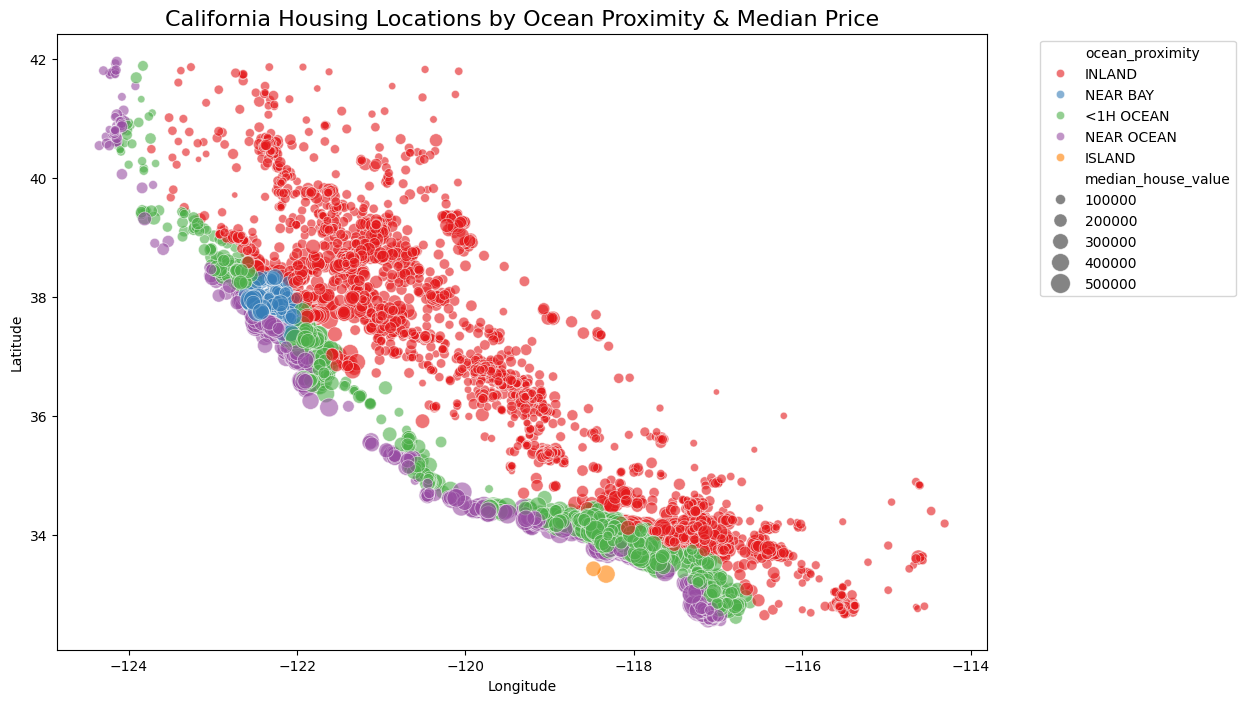

In [7]:
# Plot locations of California housing by ocean proximity and median house value
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='ocean_proximity',        
    size='median_house_value',      
    sizes=(20, 200),                 
    alpha=0.6,
    palette='Set1',
    data=df_eda
)

plt.title('California Housing Locations by Ocean Proximity & Median Price', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Notes:**
- Shows the general location of the districts corresponding accordingly to California's geographical map.
- Domination in number by Inland districts and very few of Island districts.
- Smaller dots on Northwest that increases in average size through Southeast signifying higher housing value on that direction.

### 2.5 Correlation Heatmap

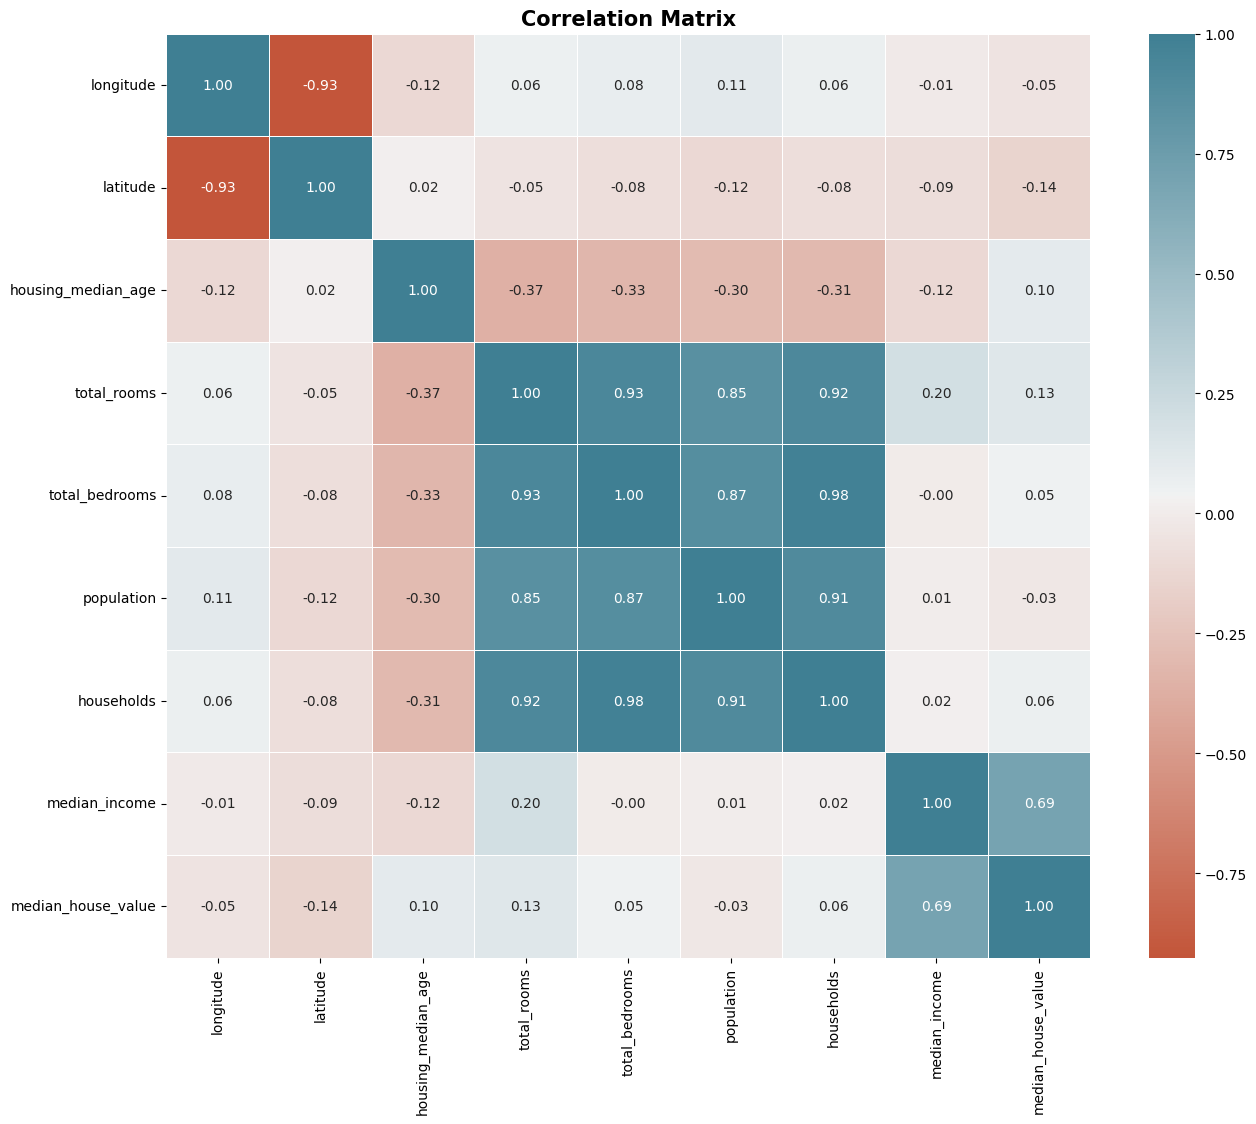

In [10]:
# Correlation matrix
df_eda_matrix = df_eda.copy().drop(columns=['ocean_proximity'])

plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_eda_matrix.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

**Notes:**
- Affirmed what the Skrub table report already shown that is multicollinearity in some of the features.
- Households, population, total_rooms, and total_bedrooms are redundant and have strong correlation (More population = more household, so does rooms and bedroom).
- The median-income feature is the best predictor with 0.69 correlation over median_house_value so far

### **2.7 Outlier Boxplot**

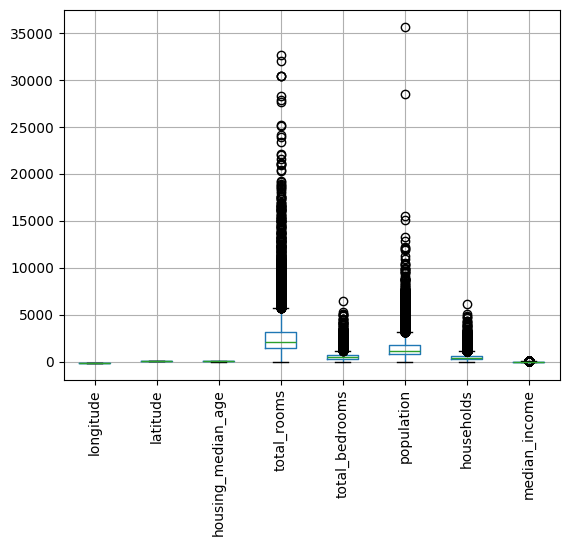

In [13]:
# Plot boxplot untuk mengecek outliers
df_features = df_eda.drop(columns=['ocean_proximity', 'median_house_value'])
df_features.boxplot(rot=90);

**Notes:**
- Lots of outliers in total_rooms, total_bedrooms, population, and households
- Other features are normal
- Will be handled along with their multicollinearity later on.

### **2.8 Target Distribution Analysis**

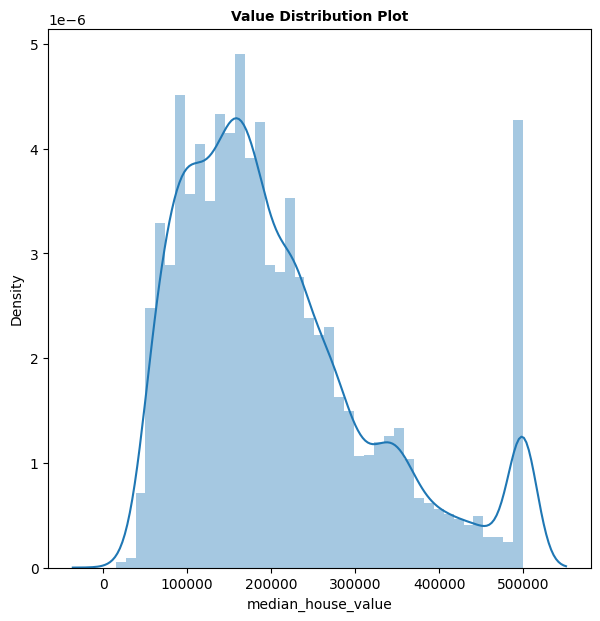

In [14]:
# Distribution plot of 'median_house_value' feature
plt.figure(figsize=(7, 7))
sns.distplot(df_eda['median_house_value'])
plt.title('Value Distribution Plot', size=10, weight='bold');

# Ignore deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

The plot shows a right skewed distribution with a hike at the most right, signaling a cap (higher than the dataset allows).

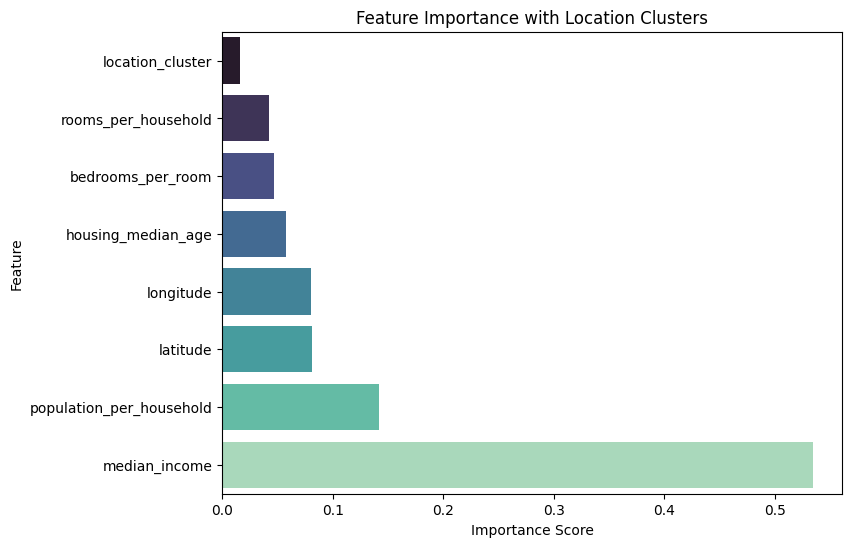

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# -------------------
# 1. Feature engineering
# -------------------
df_eda_matrix['rooms_per_household'] = df_eda_matrix['total_rooms'] / df_eda_matrix['households']
df_eda_matrix['bedrooms_per_room'] = df_eda_matrix['total_bedrooms'] / df_eda_matrix['total_rooms']
df_eda_matrix['population_per_household'] = df_eda_matrix['population'] / df_eda_matrix['households']

# -------------------
# 2. Create location clusters
# -------------------
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(df_eda_matrix[['longitude', 'latitude']])

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df_eda_matrix['location_cluster'] = kmeans.fit_predict(coords_scaled)

# -------------------
# 3. Select features & target
# -------------------
features = [
    'longitude', 'latitude', 'housing_median_age', 'median_income', 
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
    'location_cluster'
]
X = df_eda_matrix[features]
y = df_eda_matrix['median_house_value']

# -------------------
# 4. Train/test split
# -------------------
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------
# 5. Train Random Forest
# -------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# -------------------
# 6. Feature importance
# -------------------
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=importances.index, palette='mako')
plt.title('Feature Importance with Location Clusters')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


# **Part 3: Data Preprocessing**

In [77]:
# Dataset for modeling
df_model = df.copy()

### **3.1 Identify Missing Values**

Due to the missing values being total_bedrooms that has high collinearity with 3 other features and the small number it possesses, it'd be faster and simpler to insert the median of the feature (many outliers).

In [ ]:
# Total missing values per column
null_values = df_model.isnull().sum()

# Fillna process
if null_values.any():
    print(null_values.apply(lambda x: f"{x} ({x/df_model.shape[0]:.2%})"))
    print("Filling missing values...")
    df_model["total_bedrooms"] = df_model["total_bedrooms"].fillna(df_model["total_bedrooms"].median())
    print("Missing values filled for 'total_bedrooms'.")
    df_model.info()
else:
    print("No missing values found.")

No missing values found.


### **3.2 Identify Duplicated Values**

A simple drop complete duplicate rows as an iteration of the same rows would bias the model.

In [80]:
# Exact Duplicate
if df_model.duplicated().any():
    print("Duplicate rows found.")
    print("Total duplicate rows:", df_model.duplicated().sum())
    df_model.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [32]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


### **3.3 Handle Multicollinearity**

Since there are 4 features with high collinearity and redundant information, try mixing it up to gather better information and influence for the model.

In [81]:
df_model['rooms_per_household'] = df_model['total_rooms'] / df_model['households']
df_model['bedrooms_per_room'] = df_model['total_bedrooms'] / df_model['total_rooms']
df_model['population_per_household'] = df_model['population'] / df_model['households']

df_model = df_model.drop(columns=['total_rooms', 'total_bedrooms', 'population', 'households'])

**Notes:**
- Bigger population means bigger households, so does bedrooms with rooms, so these columns are worthless separated and even causes multi collinearity.
- The values of knowing combined information might yield better information for the machine learning.
- rooms_per_household suggests more room for each households that signify bigger houses.
- bedrooms_per_room suggests also similarly signifies more living space in a district.
- population_per_households suggests the number of a household's member, smaller unit means better quality of life and therefore prices.

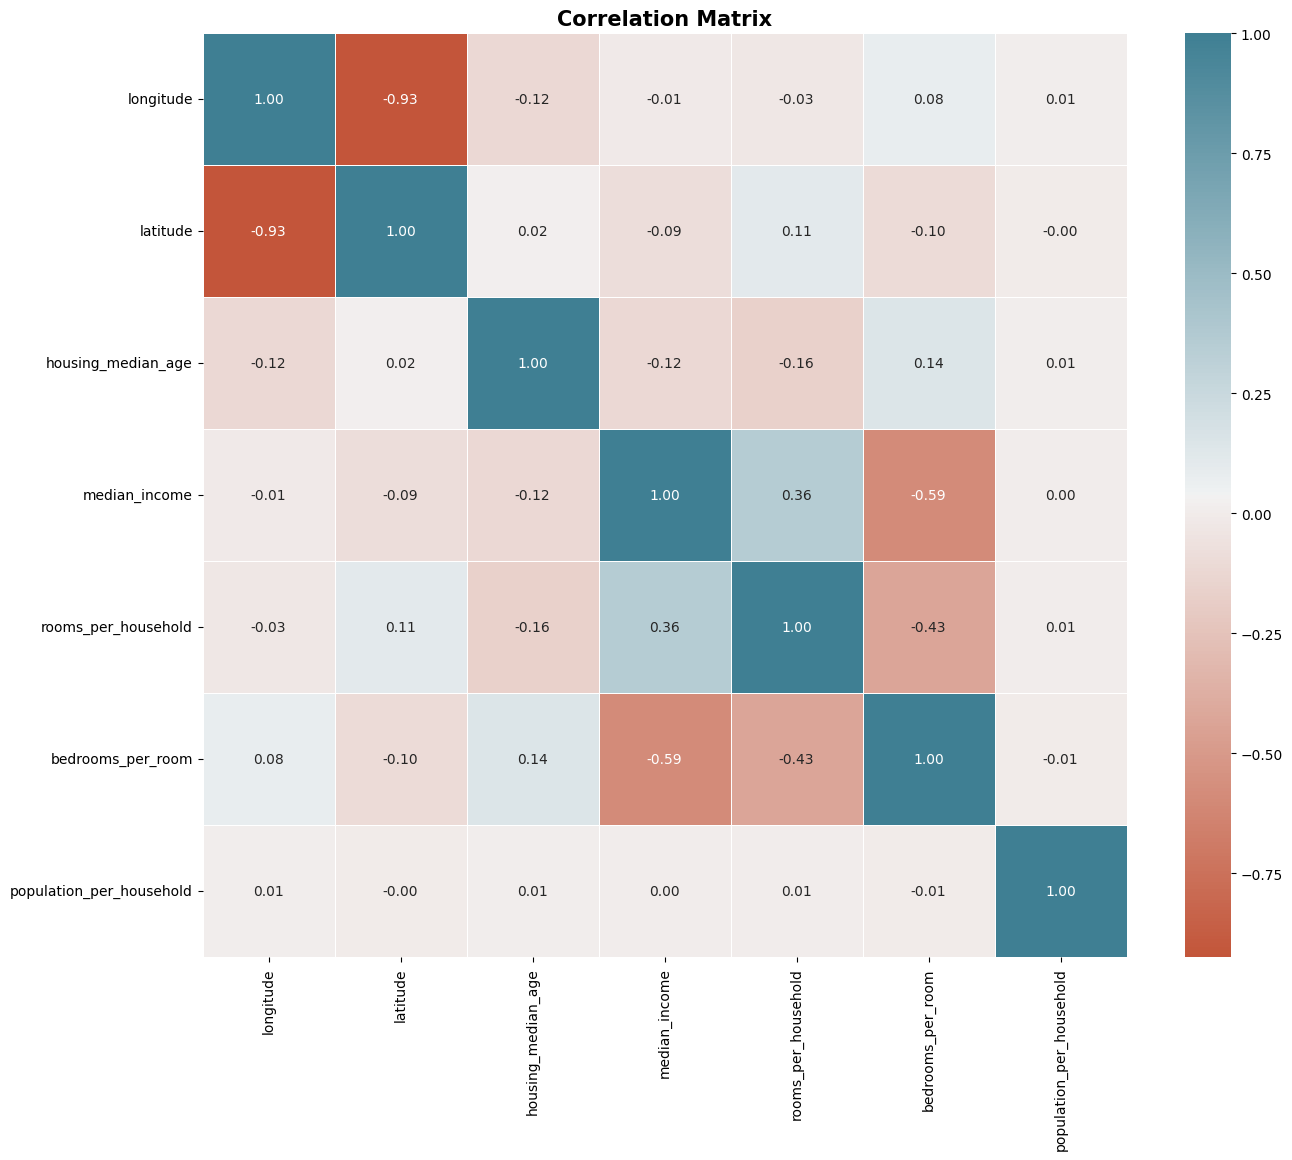

In [82]:
# Correlation matrix
df_matrix = df_model.copy().drop(columns=['ocean_proximity', 'median_house_value'])

plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_matrix.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Handles multi collinearity better as now there are no features correlating highly with each other (down from multiple 0.9s and 0.8s).

### **3.4 Handling Outliers**

New dataset after the engineered features show a still heavy outliers in population_per_household and rooms_per_household. A dropping by IQR can be beneficial to prevent bias on the model, but must be done with consideration that model is not functional for certain upper limit.

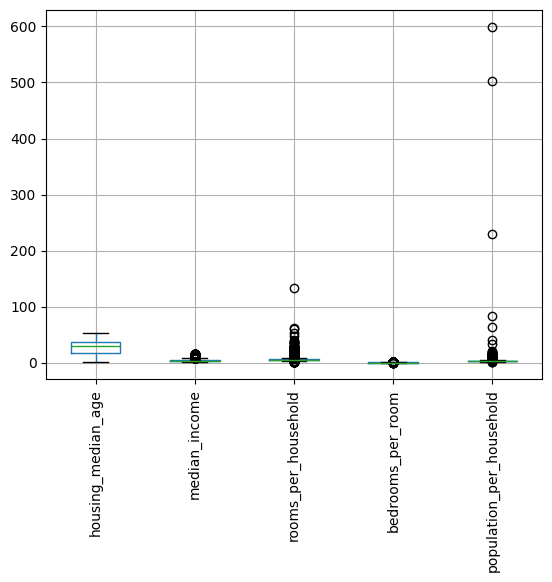

In [83]:
# Plot boxplot untuk mengecek outliers
df_features = df_model.drop(columns=['ocean_proximity', 'median_house_value', 'longitude', 'latitude'])
df_features.boxplot(rot=90);

In [84]:
df_modelx = df_model.sort_values(by='rooms_per_household', ascending=False)
df_modelx.head(10)

,longitude,latitude,housing_median_age,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
9799,-120.08,38.80,34.0,4.6250,INLAND,162500.0,132.533333,0.257042,2.400000
14288,-120.06,39.01,19.0,4.0714,INLAND,437500.0,61.812500,0.177958,2.333333
3749,-121.25,40.27,25.0,2.6250,INLAND,67500.0,59.875000,0.255741,1.750000
7594,-119.02,37.64,14.0,3.2431,INLAND,221400.0,52.848214,0.215915,2.366071
3095,-120.19,38.42,11.0,3.1250,INLAND,77500.0,47.515152,0.235332,2.484848
5552,-120.18,39.28,14.0,4.0819,INLAND,141300.0,39.755906,0.153001,2.759843
7586,-120.30,38.90,11.0,0.9227,INLAND,95500.0,37.000000,0.221826,2.132075
4833,-117.07,34.24,21.0,3.9375,INLAND,115000.0,36.715385,0.219359,2.592308
6635,-120.10,39.19,18.0,5.5456,INLAND,360000.0,36.075472,0.146182,2.273585
415,-116.86,34.23,13.0,5.4618,INLAND,147800.0,36.060606,0.197059,2.340909


In [85]:
df_modelz = df_model.sort_values(by='population_per_household', ascending=False)
df_modelz.head(10)

,longitude,latitude,housing_median_age,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
7974,-120.51,40.41,36.0,5.5179,INLAND,67500.0,5.142857,0.222222,599.714286
2583,-120.70,35.32,46.0,4.2639,NEAR OCEAN,350000.0,9.076923,0.144068,502.461538
5419,-121.15,38.69,52.0,6.1359,INLAND,225000.0,8.275862,0.183333,230.172414
7509,-118.59,34.47,5.0,4.2391,INLAND,154600.0,5.123810,0.182156,83.171429
3513,-117.33,33.97,8.0,1.6250,INLAND,162500.0,7.600000,0.125000,63.750000
7655,-118.45,34.06,52.0,9.3370,<1H OCEAN,500001.0,7.285714,0.166667,41.214286
11404,-117.63,33.94,36.0,4.2578,INLAND,183300.0,5.258824,0.212528,33.952941
10114,-117.71,34.10,52.0,1.8750,INLAND,212500.0,4.500000,0.268078,21.333333
8864,-119.09,34.22,8.0,4.0208,NEAR OCEAN,52500.0,2.500000,0.250000,19.312500
1532,-116.97,32.56,23.0,2.5625,NEAR OCEAN,153300.0,4.589091,0.232964,18.821818


In [86]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 14448 non-null  float64
 1   latitude                  14448 non-null  float64
 2   housing_median_age        14448 non-null  float64
 3   median_income             14448 non-null  float64
 4   ocean_proximity           14448 non-null  object 
 5   median_house_value        14448 non-null  float64
 6   rooms_per_household       14448 non-null  float64
 7   bedrooms_per_room         14448 non-null  float64
 8   population_per_household  14448 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1016.0+ KB


The heads of the 2 features show extreme outliers such as hundreds of people within a household or more than 10 rooms for a household that has only 2 members in it.

Initializing the trimmer and setting the fold to 2, trying to drop as little data as possible. Aiming only for extreme outliers.

In [ ]:
# Initialize the Trimmer
trimmer = OutlierTrimmer(capping_method='iqr',
                         tail='right',
                         fold=2,
                         variables=["rooms_per_household", "population_per_household"])

trimmer.fit(df_model)

# Trim the columns
df_model = trimmer.transform(df_model)

# **Part 4: Modeling**

### **4.1 Encoding**

Encoding the only categorical column in the dataset "ocean_proximity" so it can be used as part of the regression model.

In [100]:
# Changing the categorical feature into numerical

transformer = ColumnTransformer(transformers=[('One Hot', OneHotEncoder(drop='first'), ['ocean_proximity'])], remainder='passthrough')

### **4.2 Splitting**

In [93]:
# Separating features with target
X = df_model.drop(['median_house_value'], axis=1)
y = df_model['median_house_value']

In [94]:
# Splitting training dan testing data with 70:30 proportion
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

### **4.3 Pipeline**

In [101]:
# Define algorithms to be used
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Modeling is done through logarithmic scale, but conversed later on for interpretation
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Algorithm candidates
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
mean_rmse_score = []
std_rmse_score = []

score_mae = []
mean_mae_score = []
std_mae_score = []

score_mape = []
mean_mape_score = []
std_mape_score = []

# Finding the best algorithm based on each metric
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    mean_rmse_score.append(model_cv_rmse.mean())
    std_rmse_score.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    mean_mae_score.append(model_cv_mae.mean())
    std_mae_score.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    mean_mape_score.append(model_cv_mape.mean())
    std_mape_score.append(model_cv_mape.std())

[-80593.35605082 -90223.81613138 -70239.99598442 -78197.14946664
 -87475.93309321] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-48939.87914608 -50976.34342922 -45363.31345658 -48055.69433011
 -50763.02407466] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.25159582 -0.2534111  -0.23032242 -0.2526512  -0.25168356] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-58096.21384516 -63076.18277432 -56755.90448501 -56452.92932044
 -58460.86951111] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-38010.06320513 -40048.49354594 -37597.39797794 -38187.96764436
 -38712.39544748] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [102]:
# Evaluation results from each model
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': mean_rmse_score,
    'Std_RMSE': std_rmse_score,
    'Mean_MAE': mean_mae_score,
    'Std_MAE': std_mae_score,
    'Mean_MAPE': mean_mape_score,
    'Std_MAPE': std_mape_score
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-81346.050145,7074.132551,-48819.650887,2048.041745,-0.247933,0.008830
1,KNN Regressor,-58568.419987,2379.705204,-38511.263564,847.868199,-0.200500,0.006491
2,DecisionTree Regressor,-71070.002685,2160.482916,-46101.018849,1364.930583,-0.242463,0.009220
3,RandomForest Regressor,-51733.788545,2027.966642,-32960.803762,754.565507,-0.169098,0.006293
4,XGBoost Regressor,-49108.116833,1710.443251,-31558.279355,561.047589,-0.163068,0.004673


**Notes:**
- The best models are XGB and RandomForest that are both showcasing strong aptitude against the outliers.
- Outliers are still weighing down the model seen from the high RMSE and the fact that target's cap is left largely unmodified.
- XGBoost still wins over RandomForest in each metrics, though the difference is not too significant.
- Trying these 2 models next for the test.

### **4.4 Test Prediction using Top 2 Models (XGB and RendomForest)**

In [ ]:
# Benchmark the best models
models = {
    'XGB': TransformedTargetRegressor(XGBRegressor(random_state=1), func=np.log, inverse_func=np.exp),
    'RandomForest': TransformedTargetRegressor(RandomForestRegressor(random_state=1), func=np.log, inverse_func=np.exp)
}

score_rmse = []
score_mae = []
score_mape = []

# Predict the test set using the best models
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,46776.592498,30336.666462,0.158621
RandomForest,50169.867959,32280.390266,0.166955


Both models performed slightly better with XGB performing better than RandomForest in each metrics, though the difference is not too significant. The only sticking point is that XGB scored noticeably better in RMSE compared to training set.

### **4.5 Param Tuning**

Focusing solely on XGB model as it performed consistently and in certain respect significantly better than RandomForest.

In [ ]:
# Tree depth
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Tree amount
n_estimators = list(np.arange(100, 201))

# Rows in every tree (percentage of total rows in train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Higher == simpler model

# Used features in each tree (percentage of total columns in train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Higher == simpler model


# Hyperparameter XGB
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [ ]:
# Benchmark model with hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # pick one for optimization
    random_state = 1  
)

In [ ]:
# Fitting training data for best parameters trials
random_xgb.fit(X_train, y_train)

,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'model__colsample_bytree': [0.1, 0.2, ...], 'model__gamma': [1, 2, ...], 'model__learning_rate': [0.01, 0.02, ...], 'model__max_depth': [1, 2, ...], ...}"
,n_iter,50
,scoring,"['neg_root_mean_squared_error', 'neg_mean_absolute_error', ...]"
,n_jobs,-1
,refit,'neg_root_mean_squared_error'
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,1
,error_score,nan


In [ ]:
# Checking tuning result in dataframe. Sorted by RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,0.512000,0.052953,0.017738,0.002369,0.9,0.059948,119,8,0.05,5,...,676.990118,1,-0.167413,-0.178670,-0.163724,-0.174793,-0.169398,-0.170800,0.005318,1
20,0.179853,0.028145,0.013827,0.001835,0.9,0.007743,143,4,0.38,6,...,666.642226,2,-0.176992,-0.185646,-0.173764,-0.191990,-0.179754,-0.181629,0.006486,2
3,2.103180,0.216331,0.014932,0.003439,0.5,0.021544,166,8,0.10,9,...,690.805102,4,-0.185546,-0.192493,-0.183388,-0.191820,-0.187963,-0.188242,0.003515,4
17,0.293352,0.020243,0.016455,0.001797,0.6,0.001000,190,5,0.04,9,...,732.197610,3,-0.179100,-0.188447,-0.173831,-0.185719,-0.183106,-0.182040,0.005133,3
8,0.295930,0.030375,0.018506,0.008490,0.7,0.021544,182,6,0.31,2,...,791.701705,5,-0.184488,-0.191739,-0.181862,-0.197865,-0.188971,-0.188985,0.005611,5


In [ ]:
# Check the best score of the best params
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -47445.287216933524
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


In [ ]:
# XGBoost model
model = {'XGB': XGBRegressor(random_state=1)}

# Define model with best estimator
xgb_tuning = random_xgb.best_estimator_

# Model fitting
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Save RMSE, MAE & MAPE score after tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,45356.5404,30344.775473,0.167562


Model got better in RMSE, but MAE & MAPE got worse. A worthy trade off as the model is performing better against the outlier by sacrificing a small percentage of overall accuracy (still being in the reasonable range)

### **4.6 Scatterplot Prediction vs Actual Median Price**

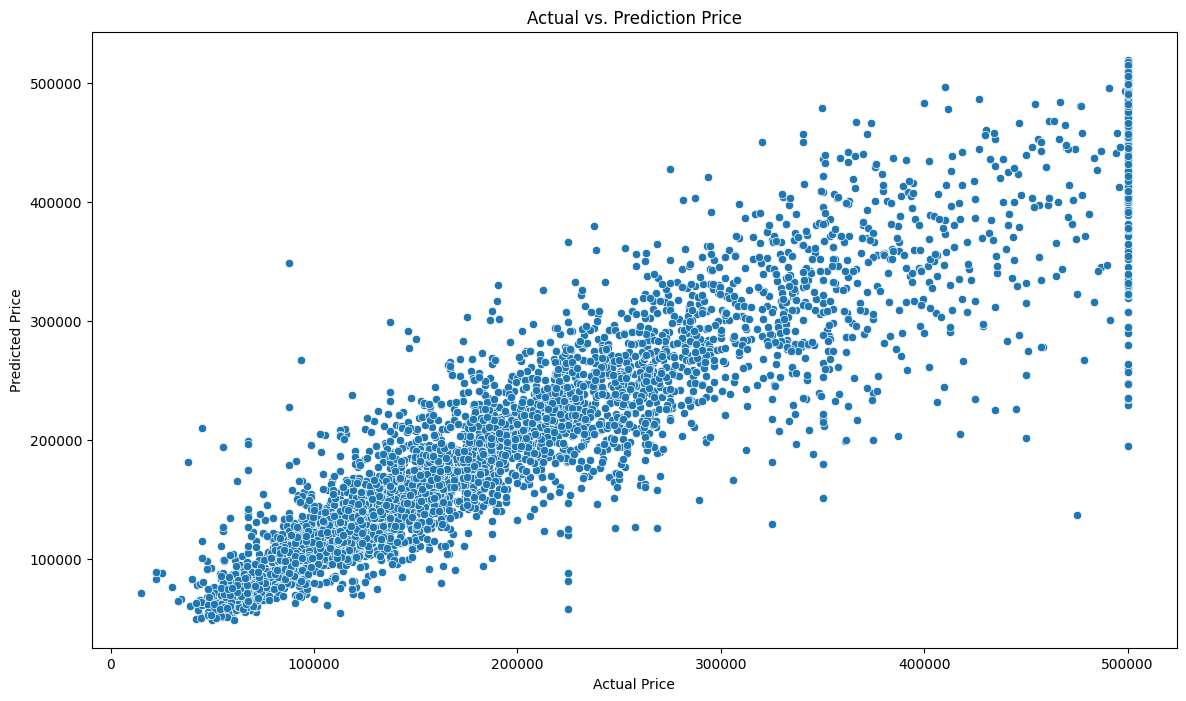

In [111]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Scatterplot shows a pretty good model with clear diagonal line signifying a more or less on-mark predictions. The accuracy gets worse the higher the actual price due to the limited data, extreme outliers, and 500k natural limit due to capping from the original dataset.

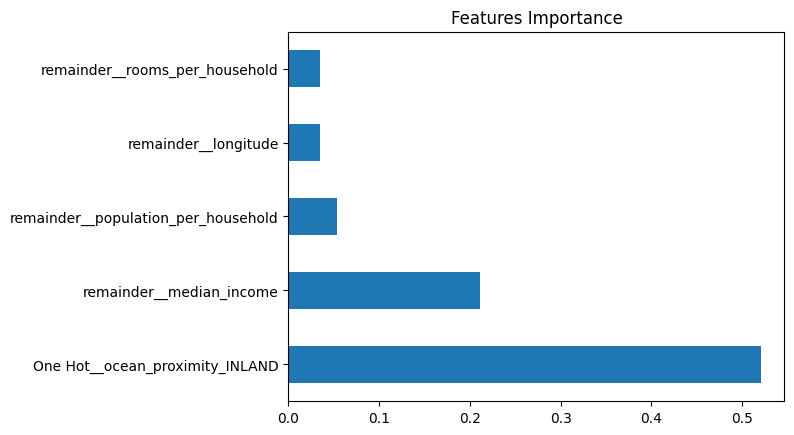

In [119]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Features Importance');

# **Part 5: Conclusion and Recommendation**

### **5.1 Conclusion**

- Inferring from the features importance chart, ocean_proximity and median_income are the two best deciding factors on the predicted price.
- Evaluation metrics using MAE, RMSE, and MAPE show that the model can perform with the accuracy of deviating 16% from the original price through MAPE. It means the predicted price from this model hovers in the mistake range of 16% from the actual price. MAE also showed that in general the model have discrepancy of USD 30.3k, while if on the far end range the discrepancy can go towards USD 45.3k.
- Regarding about outlier predictions, this model suffers significantly as the actual price got higher due to the limited data on higher price houses from the training dataset and also the natural limiter in the USD 500k cap that skews and points to existing extreme outliers beyond the maximum value.
- Improvisations can be make over the features engineering by exploring combinations of new columns from the 4 high correlation columns in the original dataset, perhaps making more informational gain feature. There is also the possibilities of ensembling models for better accuracy. Not to mention a better treatment to outliers in the features and handling of the target's high count at the cap.

### **5.2 Recommendations**

Some considerable moves forward if possible:
1. Retrieve the original, unmodified dataset that still has uncapped median house price so it can be better handled and won't leave high count of extreme outliers. It will be beneficial for training the model through more complete and less biased dataset.
2. Trying ensembling models to create a more complex model, significant help against the dataset's lack of data and features.
3. Getting more detailed features, especially for the longitude and latitude, if it's about districts in California then the actual district names itself would be much significant in influence through categorical encoding rather than unrelated and unassigned coordinates.
4. Adding some important features that are missed from the original dataset such as unemployment rate, crime rate, proximity to urban or economic hot spot, public transportation availability, etc.

5.3 Save the Model

In [121]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_CalHousePrice_XGB.sav', 'wb'))